In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [4]:
#lot area (in sq ft)
#overall quality (1 to 10)
#overall condition (1 to 10)
#total basement Area (in sq ft)
#full bathrooms
#half bathrooms
#bedrooms above ground
#rooms above ground
#fireplaces
#garage area (in sq ft)
#house price above the median or not? (1: yes and 0: no)

In [5]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
#splot data into input features and the label
dataset[:,0:10]
X = dataset[:,0:10]
Y = dataset[:,10]

In [7]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [8]:
#scale data so input features have same magnitude (normalization)
min_max_scaler = preprocessing.MinMaxScaler() #features lie between 0 and 1
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [9]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [10]:
#X_train (10 input features, 70% of dataset)
#X_val (10 input features, 15% of dataset)
#X_test (10 input features, 15% of dataset)
#Y_train (1 label, 70% of dataset)
#Y_val (1 label, 15% of dataset)
#Y_test (1 label, 15% of dataset)

In [11]:
!pip install tensorflow

In [12]:
#BUILD AND TRAIN FIRST NN
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [13]:
#SEQUENTIAL MODEL
#input layer: 10
#hidden layer 1: 30 neurons, ReLU activation
#hidden layer 2: 30 neurons, ReLU activation
#output layer: 1 neuron, sigmoid activation

In [14]:
#describe this architecture to Keras 
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'), #keras can infer input shape from output of first layer
    Dense(1, activation='sigmoid'),])

In [15]:
#which algorithm to do the optimisation
#which loss function to use
#which metrics to track besides the loss function

model.compile(optimizer='sgd', #stochastic gradient descent
              loss='binary_crossentropy', #loss function for outputs that take the values 1 or 0
              metrics=['accuracy'])

In [16]:
#training on the data
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 14ms/step - loss: 0.7048 - accuracy: 0.5020 - val_loss: 0.7014 - val_accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.4804 - val_loss: 0.6955 - val_accuracy: 0.4521
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5382 - val_loss: 0.6906 - val_accuracy: 0.5434
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.5626 - val_loss: 0.6863 - val_accuracy: 0.5799
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6836 - accuracy: 0.5548 - val_loss: 0.6822 - val_accuracy: 0.5662
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6796 - accuracy: 0.5450 - val_loss: 0.6782 - val_accuracy: 0.5662
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6756 - accuracy: 0.5871 - val_loss: 0.6741 - val_accuracy: 0.5799
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3091 - accuracy: 0.8816 - val_loss: 0.3140 - val_accuracy: 0.8630
Epoch 60/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3069 - accuracy: 0.8826 - val_loss: 0.3111 - val_accuracy: 0.8676
Epoch 61/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3044 - accuracy: 0.8816 - val_loss: 0.3124 - val_accuracy: 0.8539
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3025 - accuracy: 0.8816 - val_loss: 0.3098 - val_accuracy: 0.8539
Epoch 63/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3011 - accuracy: 0.8816 - val_loss: 0.3075 - val_accuracy: 0.8584
Epoch 64/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2982 - accuracy: 0.8816 - val_loss: 0.3032 - val_accuracy: 0.8767
Epoch 65/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2972 - accuracy: 0.8787 - val_loss: 0.3037 - val_accuracy: 0.8676
Epoch 

In [17]:
#evaluating on test set
model.evaluate(X_test, Y_test)[1] #function returns loss as [0] and accuracy as [1]

7/7 [==============================] - 0s 3ms/step - loss: 0.3573 - accuracy: 0.8721


0.8721461296081543

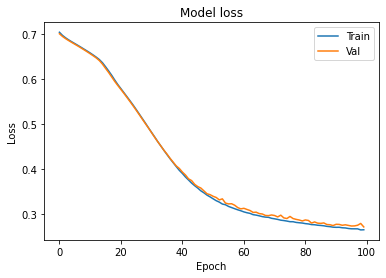

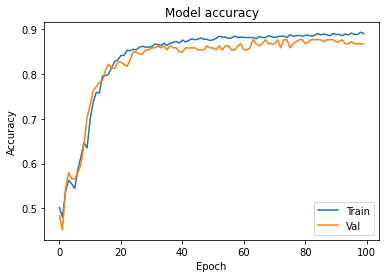

In [24]:
#visualising training loss and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#visualising training accuracy and validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
#training and validation closely matched --> overfitting isn't a huge issue here

In [23]:
#WHAT OVERFITTING WOULD LOOK LIKE
#make a larger model
#use Adam optimiser -> tweaks sgd such that it reaches the lower loss function faster

model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 73ms/step - loss: 0.5022 - accuracy: 0.7671 - val_loss: 0.3804 - val_accuracy: 0.8037
Epoch 2/100
32/32 [==============================] - 2s 53ms/step - loss: 0.3415 - accuracy: 0.8493 - val_loss: 0.3130 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 2s 53ms/step - loss: 0.3009 - accuracy: 0.8767 - val_loss: 0.2908 - val_accuracy: 0.8539
Epoch 4/100
32/32 [==============================] - 2s 49ms/step - loss: 0.2992 - accuracy: 0.8806 - val_loss: 0.2925 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 2s 47ms/step - loss: 0.2791 - accuracy: 0.8836 - val_loss: 0.2558 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 2s 58ms/step - loss: 0.2407 - accuracy: 0.8982 - val_loss: 0.2440 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 3s 86ms/step - loss: 0.2503 - accuracy: 0.8963 - val_loss: 0.2425 - val_accuracy: 0.8813
Epoch 

32/32 [==============================] - 1s 41ms/step - loss: 0.1463 - accuracy: 0.9354 - val_loss: 0.2910 - val_accuracy: 0.8904
Epoch 59/100
32/32 [==============================] - 2s 49ms/step - loss: 0.1536 - accuracy: 0.9374 - val_loss: 0.2438 - val_accuracy: 0.9087
Epoch 60/100
32/32 [==============================] - 1s 41ms/step - loss: 0.1544 - accuracy: 0.9393 - val_loss: 0.3078 - val_accuracy: 0.8950
Epoch 61/100
32/32 [==============================] - 1s 43ms/step - loss: 0.1585 - accuracy: 0.9247 - val_loss: 0.2561 - val_accuracy: 0.8904
Epoch 62/100
32/32 [==============================] - 1s 44ms/step - loss: 0.1687 - accuracy: 0.9295 - val_loss: 0.2555 - val_accuracy: 0.8950
Epoch 63/100
32/32 [==============================] - 1s 46ms/step - loss: 0.1406 - accuracy: 0.9403 - val_loss: 0.2696 - val_accuracy: 0.9132
Epoch 64/100
32/32 [==============================] - 1s 45ms/step - loss: 0.1480 - accuracy: 0.9364 - val_loss: 0.2845 - val_accuracy: 0.8950
Epoch 65/100

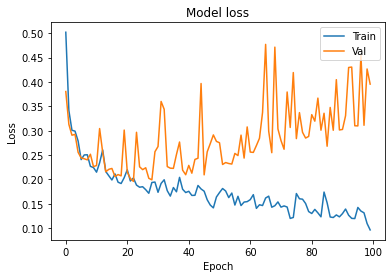

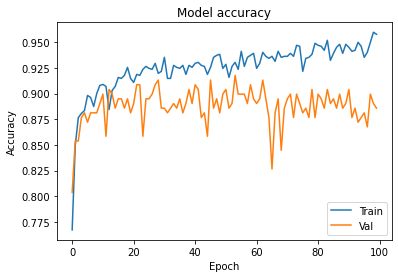

In [26]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [27]:
#training loss is decreasing, but validation loss is way above the training loss and increasing --> overfitting
#adress overfitting by incorporating regularisaion and dropout

from keras.layers import Dropout
from keras import regularizers

In [28]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),])

#kernel_regularizer=regularizers.l2(0.01) tells Keras to include the squared values of those parameters in the loss function and weigh them by 0.01
#dropout(0.3) means that the neurons in the previous layer has a probability of 0.3 in dropping out during training 

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 6s 100ms/step - loss: 14.2213 - accuracy: 0.6380 - val_loss: 3.8682 - val_accuracy: 0.8447
Epoch 2/100
32/32 [==============================] - 3s 98ms/step - loss: 1.6657 - accuracy: 0.8425 - val_loss: 0.6433 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 3s 77ms/step - loss: 0.5507 - accuracy: 0.8650 - val_loss: 0.5008 - val_accuracy: 0.8539
Epoch 4/100
32/32 [==============================] - 3s 95ms/step - loss: 0.5155 - accuracy: 0.8659 - val_loss: 0.5383 - val_accuracy: 0.8356
Epoch 5/100
32/32 [==============================] - 3s 89ms/step - loss: 0.4982 - accuracy: 0.8816 - val_loss: 0.4746 - val_accuracy: 0.8676
Epoch 6/100
32/32 [==============================] - 3s 79ms/step - loss: 0.4836 - accuracy: 0.8718 - val_loss: 0.4662 - val_accuracy: 0.8630
Epoch 7/100
32/32 [==============================] - 2s 73ms/step - loss: 0.4872 - accuracy: 0.8620 - val_loss: 0.4552 - val_accuracy: 0.8721
Epoc

32/32 [==============================] - 2s 70ms/step - loss: 0.4232 - accuracy: 0.8845 - val_loss: 0.4082 - val_accuracy: 0.8858
Epoch 59/100
32/32 [==============================] - 2s 66ms/step - loss: 0.4214 - accuracy: 0.8914 - val_loss: 0.4080 - val_accuracy: 0.8813
Epoch 60/100
32/32 [==============================] - 2s 66ms/step - loss: 0.4195 - accuracy: 0.8924 - val_loss: 0.4081 - val_accuracy: 0.8995
Epoch 61/100
32/32 [==============================] - 2s 65ms/step - loss: 0.4211 - accuracy: 0.8914 - val_loss: 0.4489 - val_accuracy: 0.8630
Epoch 62/100
32/32 [==============================] - 2s 65ms/step - loss: 0.4184 - accuracy: 0.8875 - val_loss: 0.4115 - val_accuracy: 0.8721
Epoch 63/100
32/32 [==============================] - 2s 73ms/step - loss: 0.4301 - accuracy: 0.8826 - val_loss: 0.4120 - val_accuracy: 0.8767
Epoch 64/100
32/32 [==============================] - 2s 67ms/step - loss: 0.4240 - accuracy: 0.8914 - val_loss: 0.4524 - val_accuracy: 0.8721
Epoch 65/100

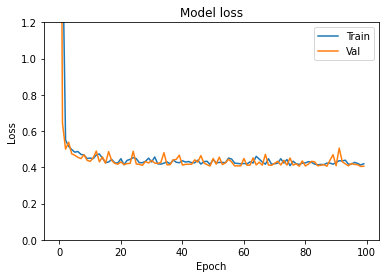

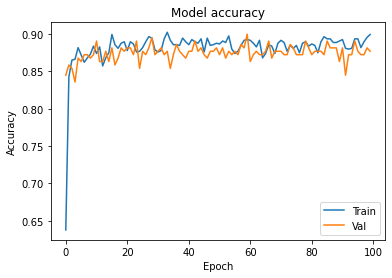

In [29]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
#reduced overfitting substantially